# Content <a id='back'></a>

* [Introduction](#Pendahuluan)
* [1. Load Data and General Information](#langkah1)
    * [Data Samples](#sampel_data1)
    * [Conclusion](#kesimpulan_sementara1)
* [2. Preparing the Data](#langkah2)
    * [Fixed Column Names](#nama_kolom)
    * [Fixed Missing Values](#nilai_hilang)
    * [Fixed Data Types](#type_data)
    * [Total Sales](#total_sales)
    * [Conclusions](#kesimpulan_sementara2)
* [3. Data Analytics](#langkah3)
    * [How many games were released in different years](#analisa_1)
    * [How many sales vary from platform to platform](#analisa_2)
    * [Platforms that have the most sales with relevant years](#analisa_3-5)
    * [Boxplot for global sales of all games grouped by platform](#analisa_6)
    * [Correlation between reviews and sales on the most popular platforms](#analisa_7)
    * [Comparison of sales of the same game on other platforms](#analisa_8)
    * [General distribution of games by genre](#analisa_9)
* [4. User profiling for each region](#langkah4)
    * [Top 5 Platforms by region](#top_5_platform)
    * [5 Genre teratas berdasarkan wilayah](#top_5_genre)
    * [Effect of ESRB rating on sales in each region](#pengaruh_esrb)
* [5. Hypothesis testing](#langkah5)
    * [1 : The average user rating for the XOne One and PC platforms is the same](#test_1)
    * [2 : The average user rating for the Action and Sports genres is different](#test_2)


# Introduction <a id='Pendahuluan'></a>

The daring "Ice" store sells video games from around the world. Data regarding game expert and user reviews, genres, platforms (e.g. Xbox or PlayStation), and game sales history data is available from open sources. It is necessary to identify the patterns that determine whether a game can be said to be successful or not. That way, you can find the games with the most potential and plan their ad campaigns.
Data from 2016 is available, which is useful for planning the 2017 campaign.

In this project an analysis of user behavior will be carried out and determine which game platform is the most popular, as well as the following two objective hypotheses:

1. The average user rating of the XOne One and PC platforms is the same.
2. The average user rating for the Action and Sports genres is different.

To achieve the objectives of the hypothesis above, the following steps are carried out:
1. Read Data and General Information
2. Fix Data
3. Analyzing Data
4. Profiling of users for each region
5. Test the hypothesis


# 1. Reading Data and General Information <a id='langkah1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.duplicated().sum()

0

In [5]:
df_games.isnull().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [7]:
df_games.shape

(16715, 11)

In [8]:
df_games.isnull().sum().sort_values(ascending=False) / df_games.shape[0] * 100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

In [9]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Membaca Sampel Data <a id='sampel_data1'></a>

In [10]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Conclusion <a id='kesimpulan_sementara1'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
From the steps above and reading the data taken from the file '/datasets/games.csv', it is known that the file has 11 columns and 16715 rows. The column names of the file must be corrected because they still use a mixture of uppercase and lowercase letters. Also, there are no duplicate values ​​in the file. However there are some missing values ​​and the data type must be corrected. For missing values ​​and corrected data types, the following information is provided:
     
*Missing Value
- Critic_Score column 8578 or about 51% missing values
- Rating Column has 6766 or about 40% missing value
- The User_Score column has 6701 or about 40% missing values
- The Year_of_Release column has 269 or about 1% missing values
- The Name Column and the Genre Column have 2 or about 0.01% missing values
- For other columns there are no missing values
     
*Data Types
- The Year_of_Release column should be of type int
- The Critic_Score column should be of type int
- The User_Score column should be of float data type

     The next step is to fix column names, fix data types, fix missing values, and look at data oddities through descriptive tables.
</div>

# 2. Prepare The Data <a id='langkah2'></a>

# Fixed Column Names <a id='nama_kolom'></a>

In [11]:
def get_lowercase_column(df):
    return df.rename(str.lower, axis='columns')

df_games = get_lowercase_column(df_games)
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# Fixed Missing Values <a id='nilai_hilang'></a>

In [12]:
def mean_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [13]:
def median_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [14]:
df_games.loc[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
df_games.loc[df_games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
df_games = df_games.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [16]:
#Fill in the missing year_of_release value
#df_games = mean_missing_value(df_games, 'platform', 'year_of_release')

In [17]:
#Fill in the missing critic_score value
#df_games = mean_missing_value(df_games, 'genre', 'critic_score')

In [18]:
df_games.loc[df_games['year_of_release'].isnull()].shape[0]

269

In [19]:
#Replaces NaN values with 0 in year_of_release
df_games['year_of_release'] = df_games['year_of_release'].replace(np.nan, 0)

In [20]:
df_games.loc[df_games['year_of_release'].isnull()].shape[0]

0

In [21]:
df_games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [22]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

In [23]:
df_games['user_score'] = df_games['user_score'].astype('float')

In [24]:
##Fill in the missing user_score value
#df_games = mean_missing_value(df_games, 'genre', 'user_score')

In [25]:
#Mengurutkan nilai unik rating
df_games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [25]:
#Convert Rating Function
def get_convert_rating(values):
    nan = np.nan
    if values == 'RP':
        return 0
    elif values == 'EC':
        return 1
    elif values == 'K-A':
        return 2
    elif values == 'E':
        return 3
    elif values == 'E10+':
        return 4
    elif values == 'T':
        return 5
    elif values == 'M':
        return 6
    elif values == 'AO':
        return 7
    else:
        return nan

In [26]:
df_games['convert_rating'] = df_games['rating'].apply(get_convert_rating)

In [27]:
df_games = mean_missing_value(df_games, 'genre', 'convert_rating')

In [28]:
df_games['convert_rating'] = df_games['convert_rating'].astype('int')

In [29]:
df_games['rating'] = df_games['rating'].replace(np.nan, 'unknown')

In [30]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  convert_rating   16713 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


# Fixed Data Types<a id='type_data'></a>

In [31]:
df_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,convert_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,3
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,3
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,3
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,4


In [32]:
df_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
convert_rating       int64
dtype: object

In [33]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

In [34]:
df_games.loc[df_games['critic_score'].isnull()].shape[0]

8576

In [35]:
#Converts the critic_score data type to int
#df_games['critic_score'] = df_games['critic_score'].astype('int')

In [36]:
#Convert user_score value to decimal number
df_games['user_score'] = df_games['user_score'].round(1) * 10

In [37]:
df_games.loc[df_games['user_score'].isnull()].shape[0]

9123

In [38]:
#Convert user_score data type to int
#df_games['user_score'] = df_games['user_score'].astype('int')

In [39]:
# Checks whether the data type has changed
df_games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
convert_rating       int64
dtype: object

# Total Sales<a id='total_sales'></a>

In [40]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [41]:
df_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,convert_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,3,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,3,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,3,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,3,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,4,31.38


# Conclusion<a id='kesimpulan_sementara2'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
In the section for fixing missing values, delete two null rows from the name and genre columns.
Then fill in the value in the year_of_release column using the average based on platform grouping. For the column critic_score, user_score, fill in the value using the average based on the genre.
Previously, for the user_score column, there was a row with a tbd value, which was then replaced with a nan value to make it easier to fill in missing values.
Ratings are also categorized into several categories to make it easier to fill in missing values ​​and for analysis.
The following are for rating conversion categories:
     
* RP > Rating Pending > - becomes 0
* EC > Early Childhood > 3+ to 1
* K-A > Kids to Adult > 6+ to 2
* E > Everyone > 6+ becomes 3
* E10 + > Everyone 10 and Older > 10+ becomes 4
* T > Teen > 13+ becomes 5
* M > Mature > 17+ becomes 6
* AO > Adult Only > 18+ becomes 7


In the data repair section, year_of_release, critic_score, and user score are changed to int data types.
total_sales is obtained from the total of all regional revenues and other_sales. The next step is to analyze the data for several purposes.
</div>

# 3. Data Analytics <a id='langkah3'></a>

# How many games were released in different years <a id='analisa_1'></a>

In [42]:
df_games.shape

(16713, 13)

In [43]:
agg_games_year = df_games.groupby(['year_of_release']).agg({'name' : 'count'}).sort_values('year_of_release').reset_index()

In [44]:
agg_games_year.head(5)

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17


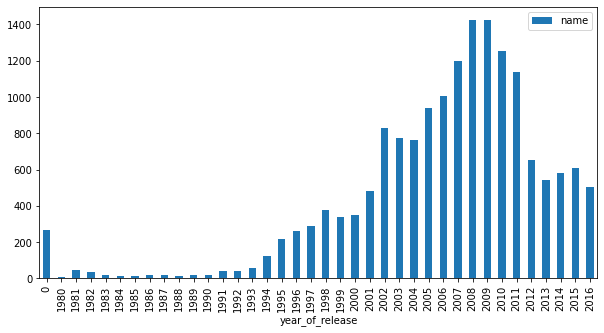

In [45]:
agg_games_year.plot(kind='bar', x='year_of_release', figsize=(10,5))
plt.show()

In [46]:
df_games.loc[df_games['year_of_release'] < 2001 ].shape[0]

2593

In [47]:
df_games.loc[df_games['year_of_release'] >= 2001 ].shape[0]

14120

In [48]:
df_games.loc[df_games['year_of_release'] == 2008 ].shape[0]

1427

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
In the bar plot, you can see that from 1980 to 1994 there were very few games released. For example, in 1980 only 9 games were released. Starting in 2001 there was a significant increase. Total games released in 2001 with the year above are 14361 games. This is very different from under 2001 with only a total of 2352 released games. The highest peak was in 2008 with 1524 released games. However, that year there was also a gradual decline.
     
</div>

# How sales vary from platform to platform <a id='analisa_2'></a>

In [49]:
pivot_games_platform = df_games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

In [50]:
pivot_games_platform.head(5)

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS2,339.29,139.20,583.84,193.44,1255.77
1,X360,270.76,12.43,602.47,85.76,971.42
2,PS3,330.29,80.19,393.49,135.68,939.65
3,Wii,262.21,69.33,496.90,79.07,907.51
4,DS,188.89,175.57,382.40,59.26,806.12


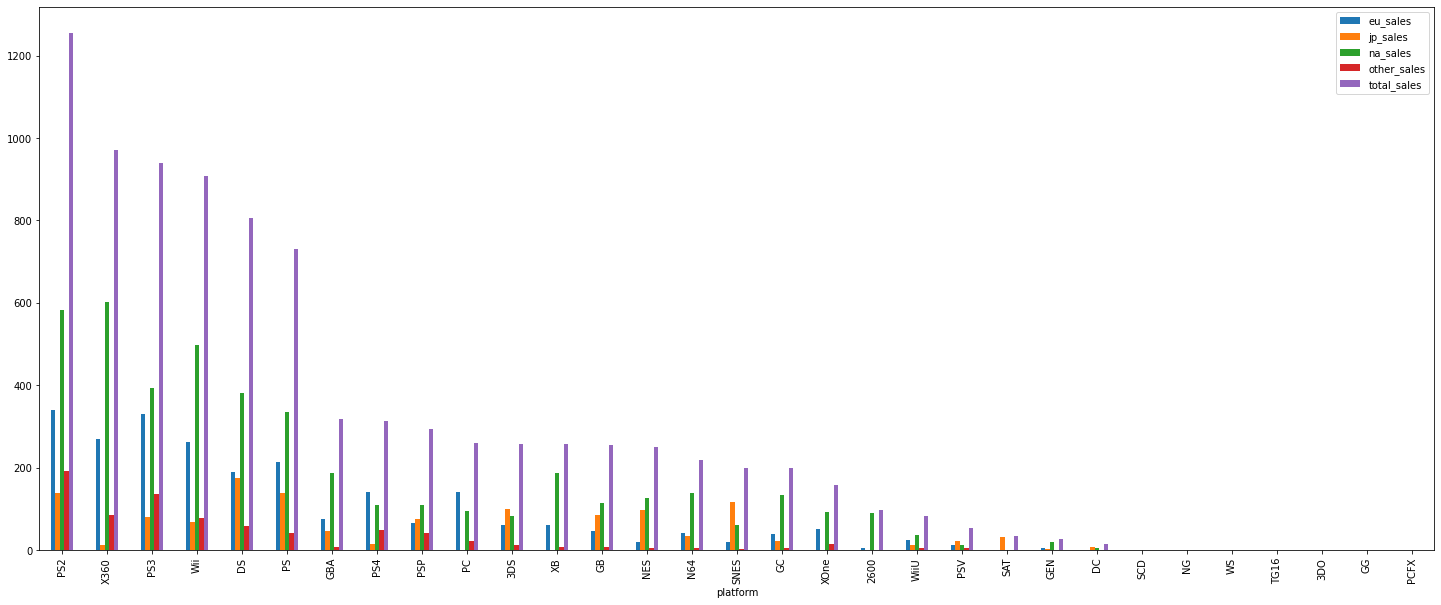

In [51]:
pivot_games_platform.plot(kind='bar', x='platform', figsize=(25,10))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Total sales from one platform to another varies greatly. The highest total sales are on the PS2 platform. In PS2, the sales ranking based on region is North America, Europe, and finally Japan.
The second highest sales from the X360 platform, then the PS3. Based on the plot above, it can be seen that from the PSV to PCFX platforms, total sales were very small. If based on region, the highest sales from the North America region is the X360 platform, Europe is the PS2 and PS3 platforms, and Japan is the Nintendo DS platform.
     
</div>

In [52]:
df_games_ps2 = df_games.query('platform == "PS2" and year_of_release != 0').reset_index(drop=True)

In [53]:
df_games_ps2.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,convert_rating,total_sales
0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,90.0,M,6,20.81
1,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,87.0,M,6,16.15
2,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,84.0,E,3,14.97
3,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,85.0,M,6,13.10
4,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,85.0,E,3,11.65


In [54]:
pivot_games_ps2 = df_games_ps2.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values('year_of_release')

In [55]:
pivot_games_ps2.head(5)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2000,10.64,8.87,16.08,3.58,39.17
2001,52.37,17.79,79.49,16.78,166.43
2002,65.27,21.85,96.54,21.72,205.38
2003,61.20,18.88,83.54,20.69,184.31
2004,56.01,19.17,96.78,39.85,211.81


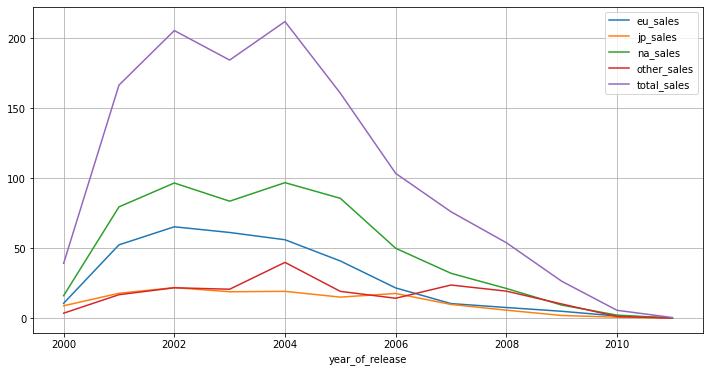

In [56]:
pivot_games_ps2.plot(figsize=(12, 6), grid=True)
plt.show()

In [58]:
pivot_games_ps2.query('year_of_release <= 2000 and year_of_release != 0')

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2000,10.64,8.87,16.08,3.58,39.17


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Based on the previous bar plot, the highest total sales were for the PS2 platform. PS2 appeared in 2000 with total sales of around 40M. Of the total sales continued to increase until 2002 with a value of around 210 billion, it had decreased in 2003, rose again until 2004 (the highest peak) with a value of 280 billion. But then total sales continued to decline until 2011 around 10M. From the distribution by region, North America is the highest, the pattern is the same as total sales. The lowest was from Japan with a value of under 25 billion from 2000 to 2010.
</div>

In [57]:
df_games.query('platform == "PS4" and year_of_release >=2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,convert_rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,3,7.60
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,79.0,T,5,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,34.0,M,6,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,84.0,M,6,4.07
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,70.0,M,6,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,75.0,unknown,4,0.01
16501,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,4,0.01
16524,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,79.0,T,5,0.01
16528,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,55.0,M,6,0.01


In [58]:
#The function creates a plot with the year index and the value is total_sales

df_games = df_games.query('year_of_release != 0').reset_index(drop=True)

def get_plot_year(df, device):
    df_games_platform = df.loc[df['platform'] == device].reset_index(drop=True)
    pivot_platform = df_games_platform.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values('year_of_release')
    title = 'Total Sales ' + str(device)
    pivot_platform.plot(title=title, figsize=(12,6), grid=True)

#get_plot_year(df_games, 'Wii')

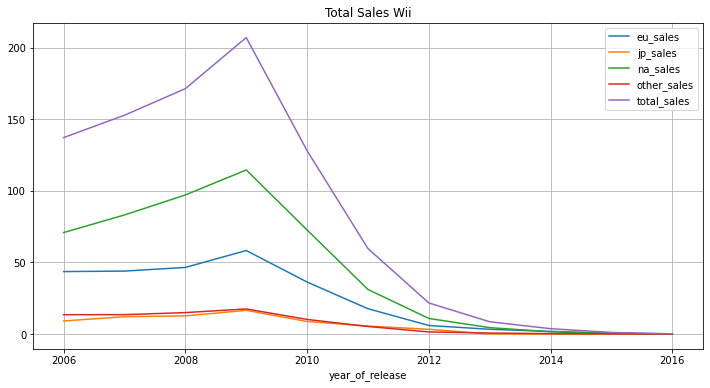

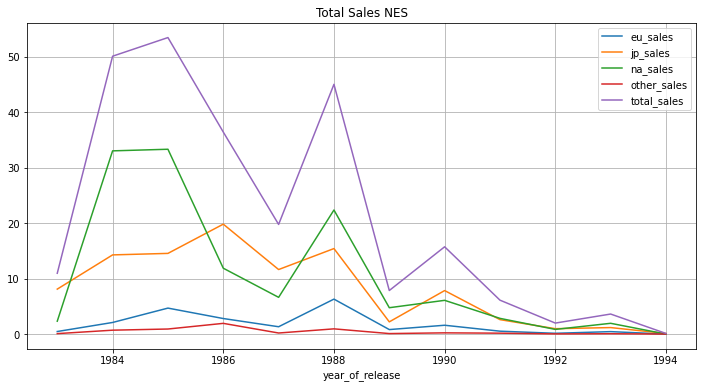

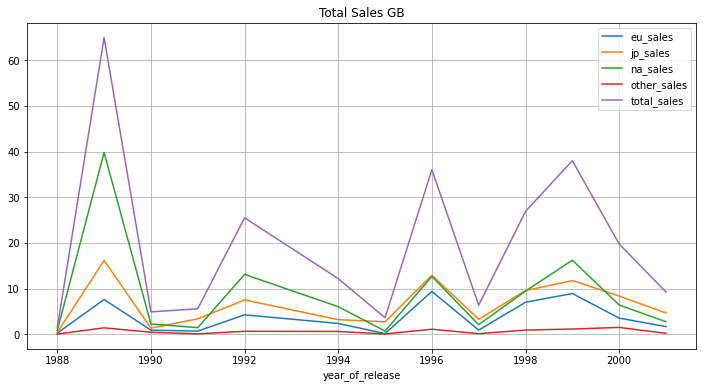

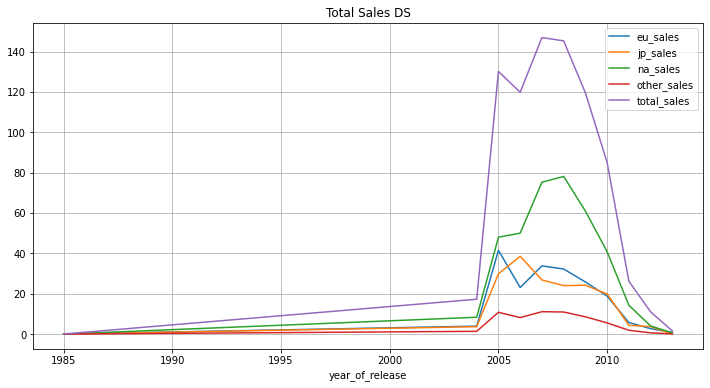

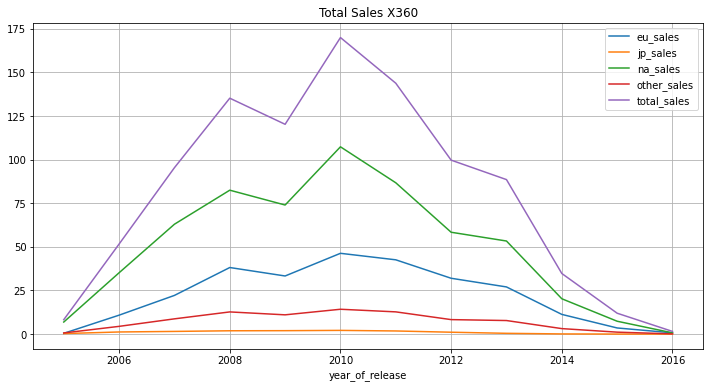

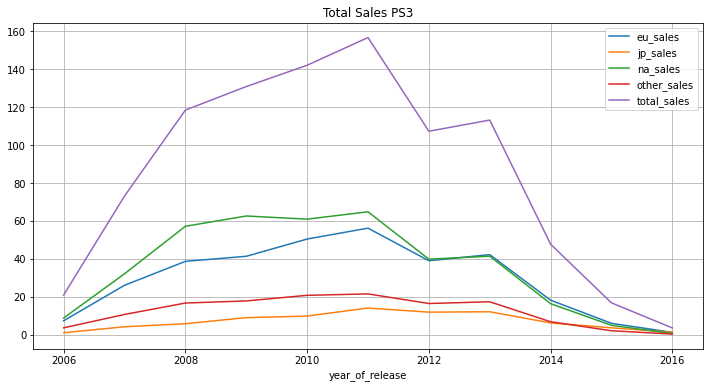

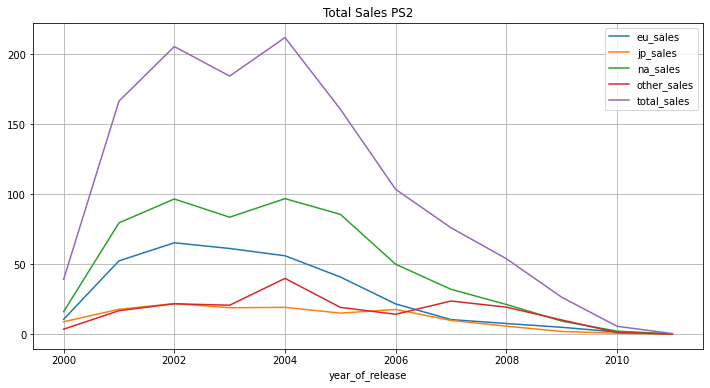

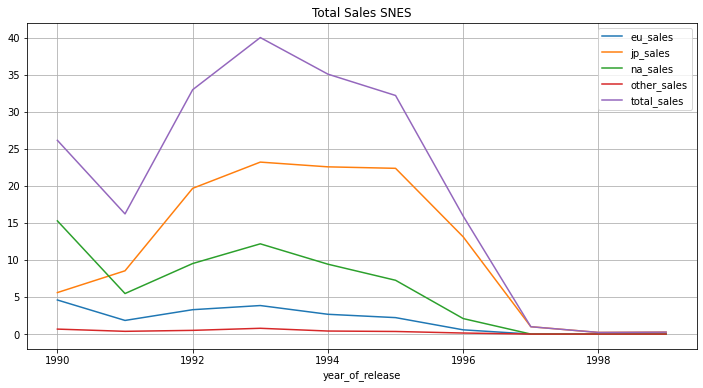

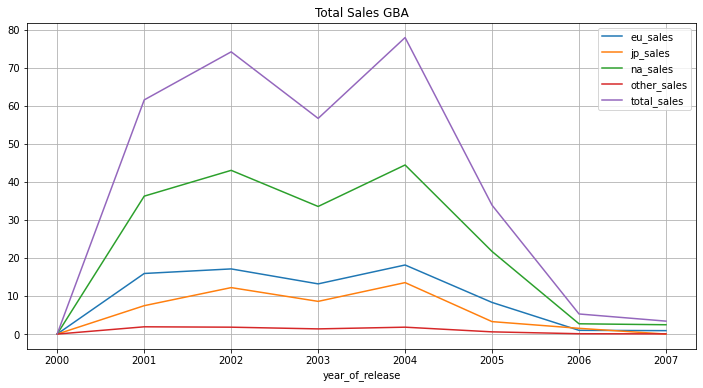

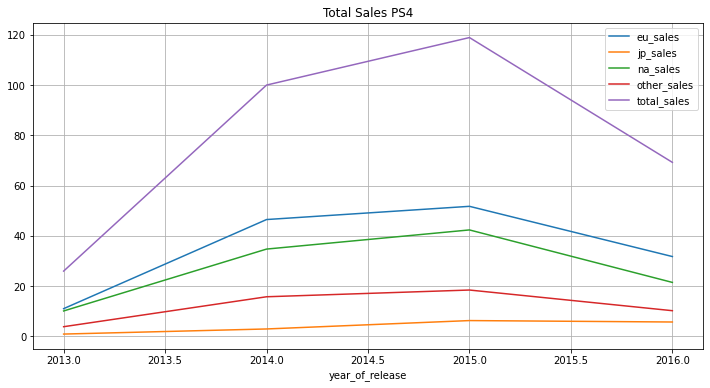

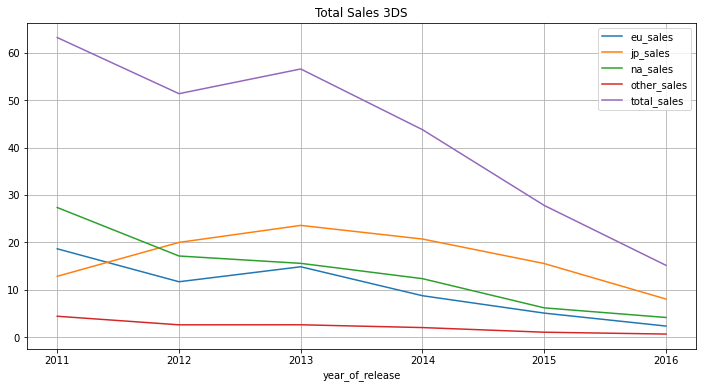

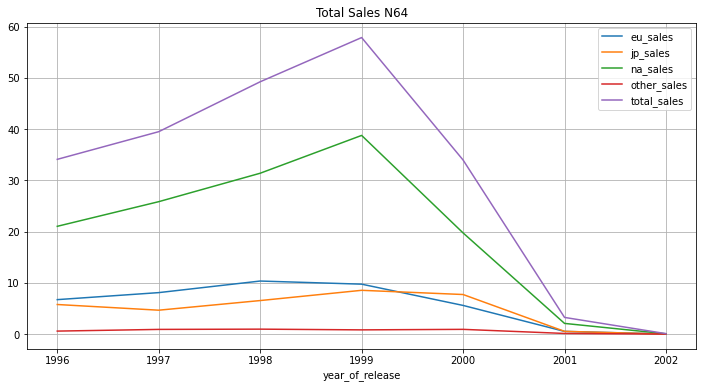

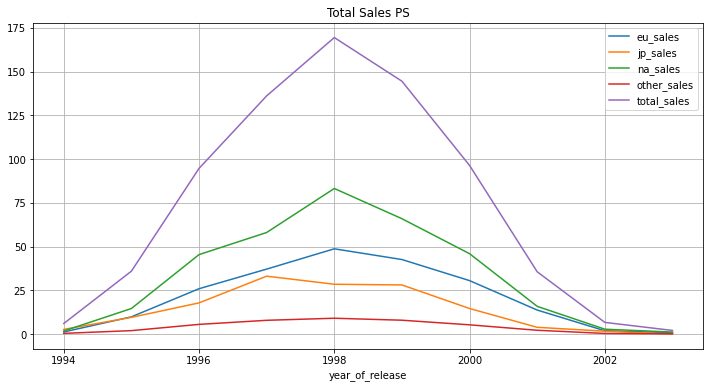

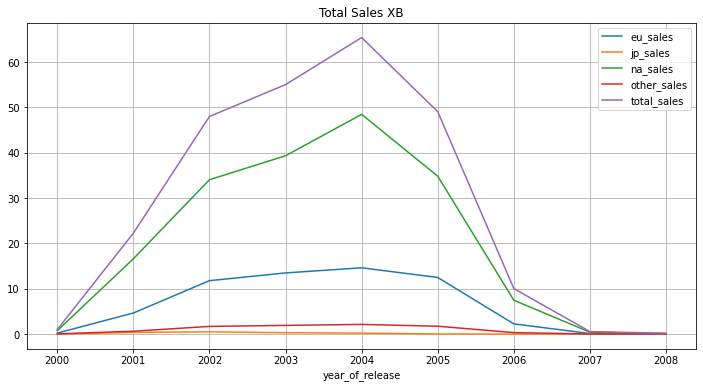

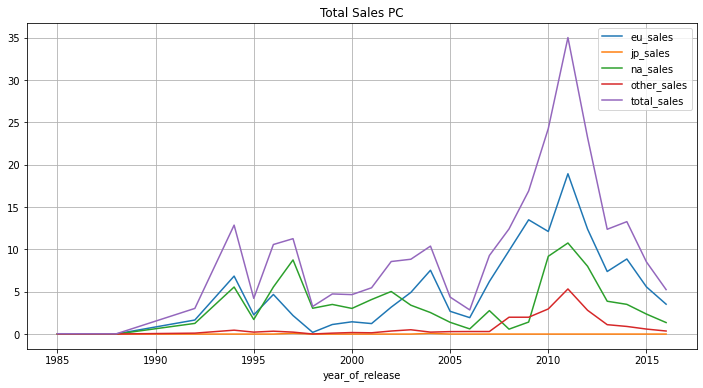

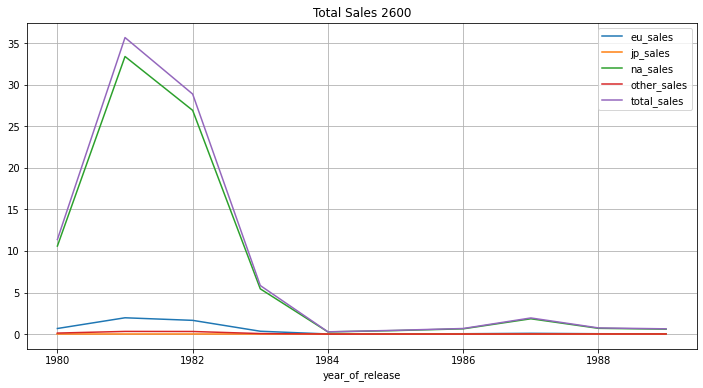

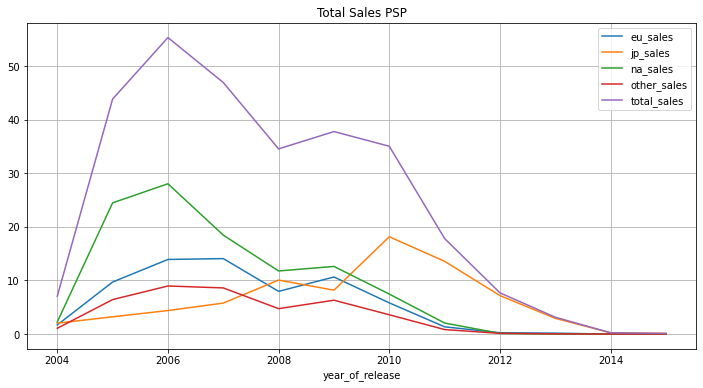

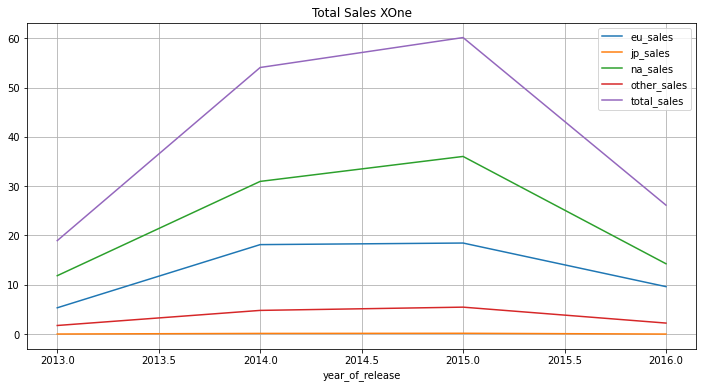

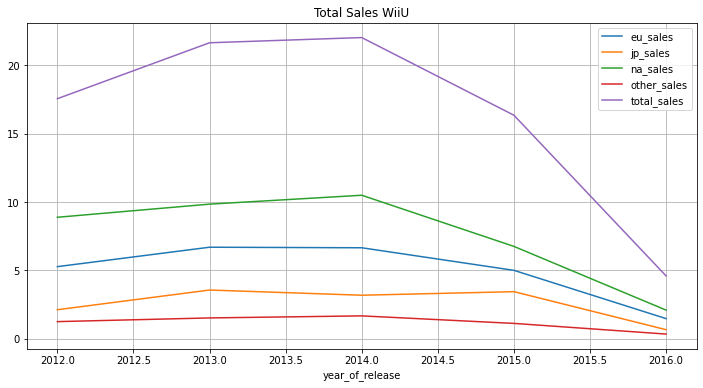

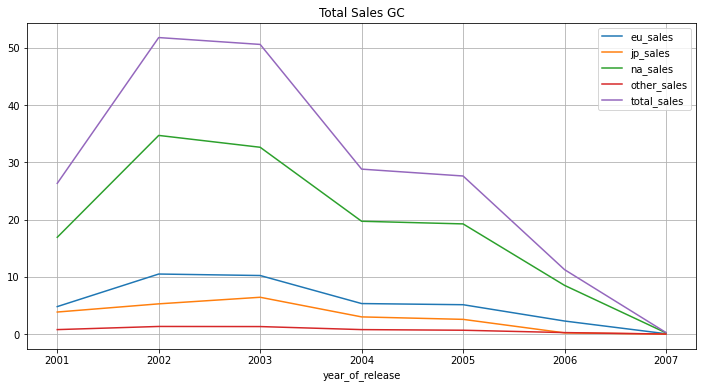

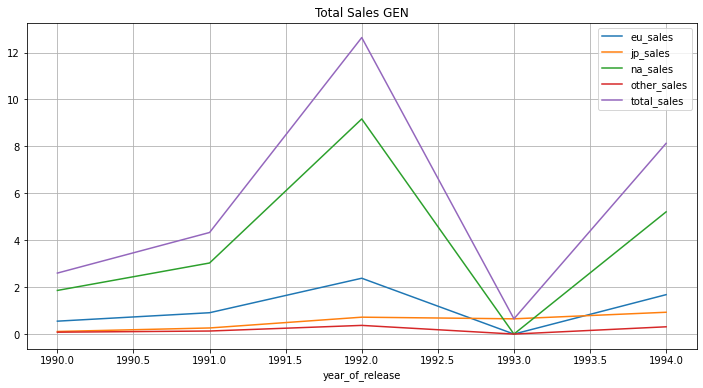

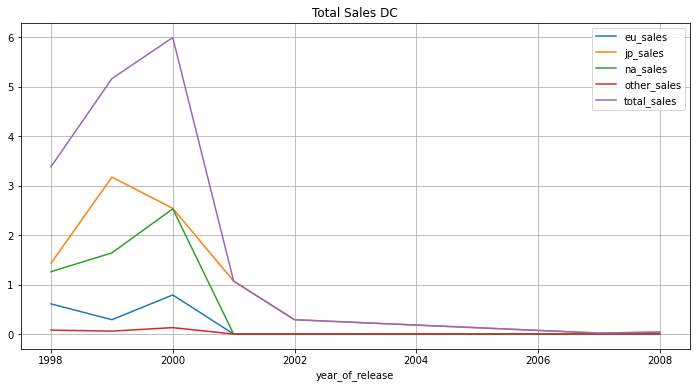

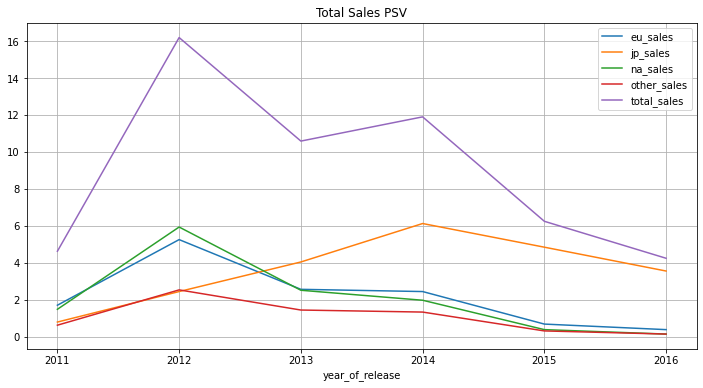

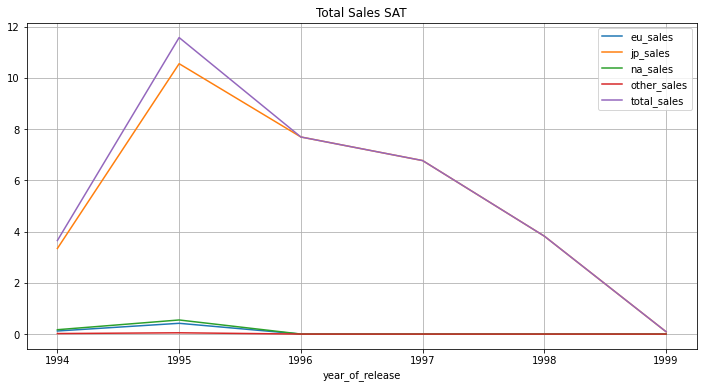

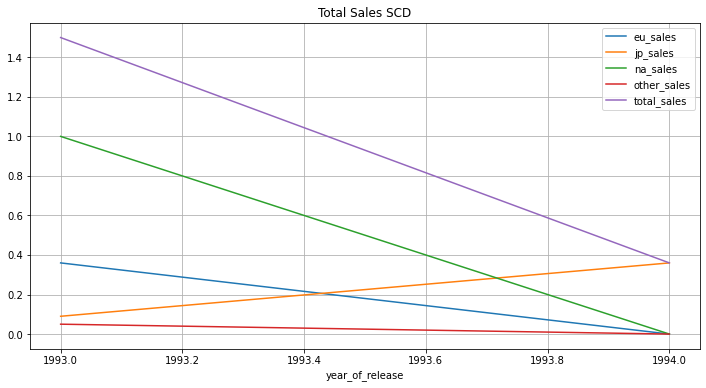

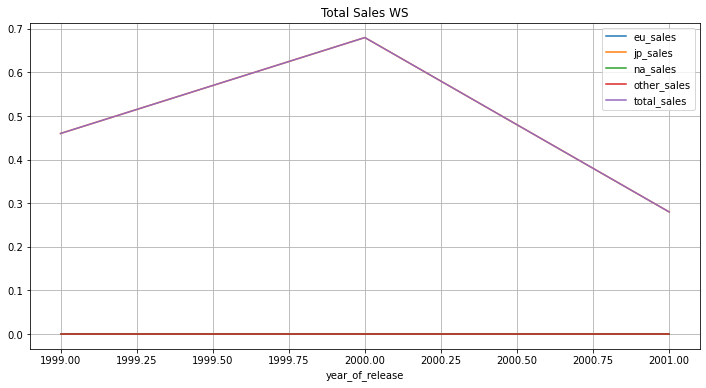

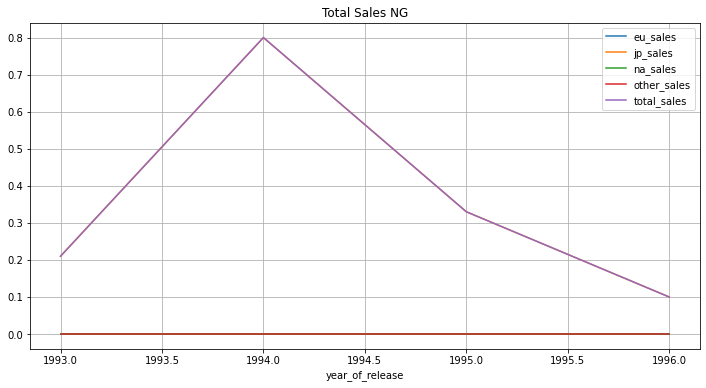

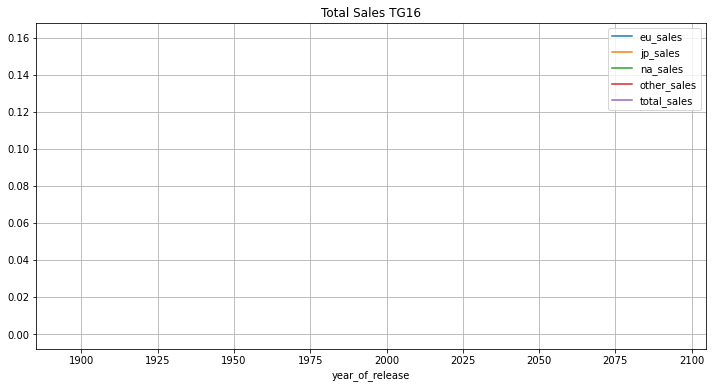

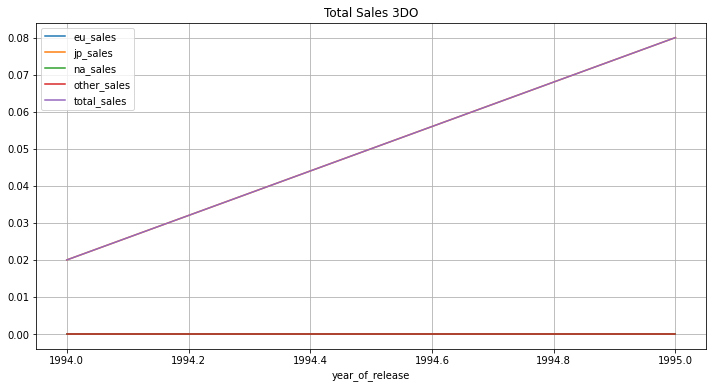

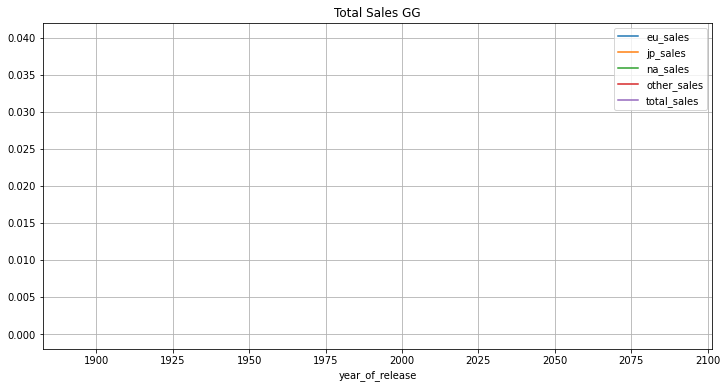

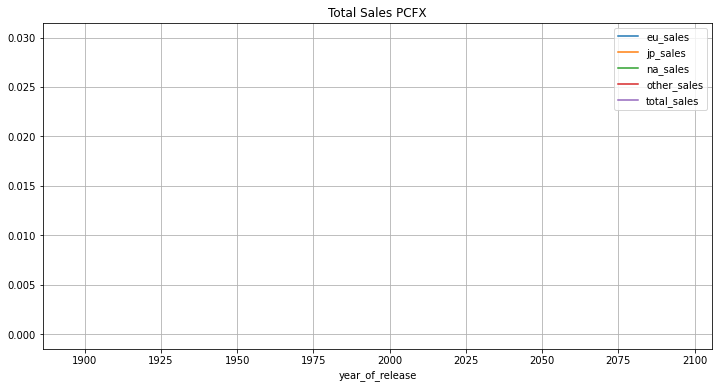

In [59]:
for value in df_games['platform'].unique():
    get_plot_year(df_games, value)
    plt.show()

In [62]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*From the plots and information above, an analysis of platform popularity and time required can be carried out as follows:
- The release of the Wii in 2006 was very popular. It took 3 years to reach the peak of total sales which is in 2009 around 210M. Then for 6 years total sales continued to decline until 2016 and almost no sales.
- NES appeared in 1982. Very popular in 1984 to 1988, until 1994 almost no sales.
- GB appeared in 1988. GB's popularity fluctuated, very popular in 1989, then declined until 1990. Popular again in 1992, 1996, and 1999. Around 2011 there were still total sales of around 10M.
- DS appeared around 1985 and sales increased significantly from 2004 to 2008. Then it continued to decline until 2013 with almost no sales.
- X360 appeared in 2005, it took 6 years to reach the peak of total sales in 2010. Then for 6 years until 2016 it declined and almost no sales.
- PS3 appeared in 2006, it took 5 years to reach the peak of total sales, namely in 2011. Then for 6 years until 2016 it declined, but there were still around 3M total sales.
- PS2 appeared in 2000, it took 4 years to reach the peak of total sales, namely in 2004. Then for 7 years until 2011 it declined and there were almost no sales.
- The SNES appeared in 1990, was very popular in 1993. Then it declined steadily until 1998 with almost no sales.
- GBA appeared in 2000, it took 4 years to reach the peak of total sales, namely in 2004. Then for 3 years, namely until 2007, it declined, but there were still sales of around 5M.
- PS4 appeared in 2013, took 2 years to reach the peak of total sales in 2015. Then it decreased in 2016 but total sales were still high around 70M.
- 3DS appeared in 2011 and immediately became popular with total sales of around 65M. Starting in 2013 it started to decrease until 2016, but there are still total sales of around 15M.
- N64 appeared in 1996, it took 3 years to reach total sales i.e. 1999. Then for 3 years until 2002 it declined and almost no sales.
- PS appeared in 1994, it took 4 years to reach the peak of total sales in 1998. Then for 5 years it declined until 2003 almost and there were no sales.
- XB appeared in 2000, it took 4 years to reach the peak of total sales in 2004. Then for 4 years it also declined until 2008 almost and there were no sales
- PC came into existence in 1985. PC popularity fluctuated, very popular in 2011. Then slumped until 2017 but still have total sales around 5M.
- 2600 appeared in 1980, it took 2 years to reach the peak of total sales which was in 1982. Then it dropped to 1989 but there were still sales of around 1M.
- PSP appeared in 2004, it took 2 years to reach the peak of total sales in 2006. Then for 8 years it declined until 2014 and almost no sales.
- XOne appeared in 2013, it took 2 years to reach the peak of total sales in 2015. Then decreased for 1 year until 2016 but there are still around 26M sales.
- WiiU appeared in 2012, it took 2 years to reach the peak of total sales i.e. in 2014. Then decreased for 1 year until 2016 but there are still almost 5M sales.
- GC appeared in 2001, took 2 years to reach peak total sales in 2003. Then decreased for 4 years until 2007 and almost no sales.
- DC appeared in 1998, it took 3 years to reach the peak of total sales in 2000. Then decreased for 8 years until 2008 and almost no sales.
- PSV appeared in 2011, it took 1 year to reach the peak of total sales in 2012. Then it fluctuated for 4 years until 2016 but there were still almost 5M sales.
- SAT appeared in 1994, it took 1 year to reach the peak of total sales in 1995. Then decreased for 4 years until 1999 and almost no sales.
- SCD, WS, NG, TG16, 3DO, GG, and PCFX from the beginning of the year of emergence until the year of unpopularity only had total sales below 2M.

It can be concluded from the 31 platforms above that it takes at least 1 year or a maximum of 5 years to reach peak total sales. Then it took 3 years at the fastest or 8 years at the most to decline and almost no sales. The next step is to do a deeper analysis, namely filtering dataframes with more relevant years.

</div>

# Platforms that have the most sales with relevant years <a id='analisa_3-5'></a>

In [60]:
# Determine the data period of more than 2012, because that year is the latest generation, namely the 8th generation of video games.
df_games_new = df_games.loc[df_games['year_of_release'] >= 2012].reset_index(drop=True)

In [61]:
df_games_new.shape[0], df_games.shape[0]

(2886, 16444)

In [62]:
df_games_new.shape[0] / df_games.shape[0] * 100

17.550474337144248

In [63]:
df_games_new.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,convert_rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,6,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,6,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,5,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,4,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,6,13.79


In [64]:
pivot_games_new_platform = df_games_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

In [65]:
pivot_games_new_platform.head()

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.09,15.96,108.74,48.35,314.14
1,PS3,106.86,35.29,103.38,43.26,288.79
2,X360,74.52,1.57,140.05,20.40,236.54
3,3DS,42.64,87.79,55.31,8.87,194.61
4,XOne,51.59,0.34,93.12,14.27,159.32


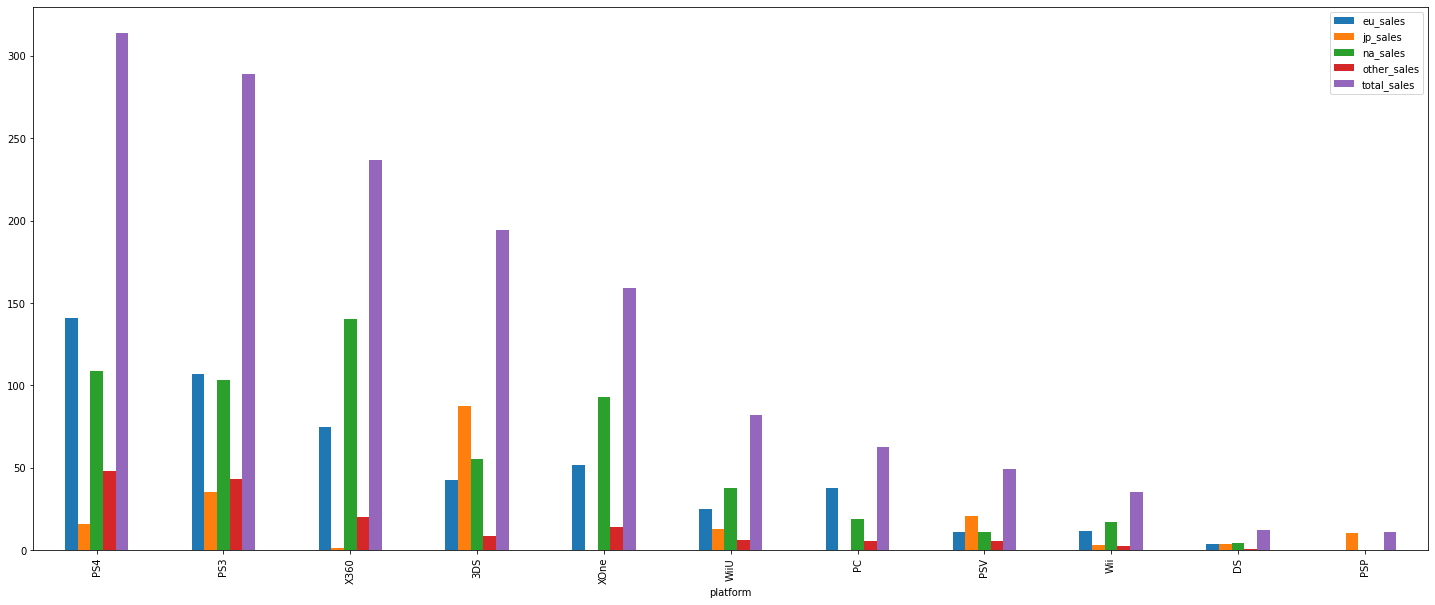

In [66]:
pivot_games_new_platform.plot(kind='bar', x='platform', figsize=(25,10))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
After filtering by the release year of the 8th game generation, which is more than the same as 2012, PS4 occupies the first place in total sales, followed by PS3, X360, 3DS and XOne. But this is the total sales for the whole year, you need to check again whether there is a decrease in sales until there are no sales.
</div>

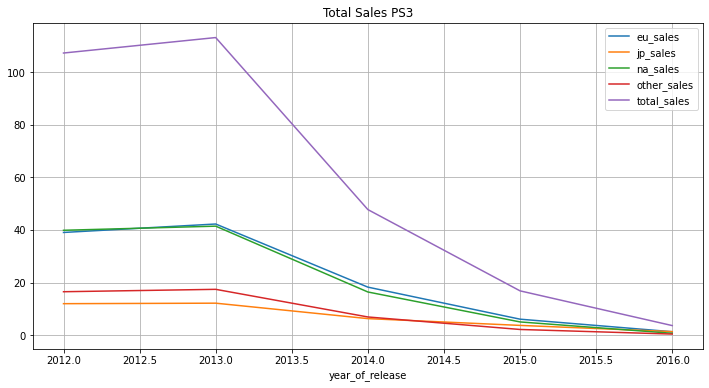

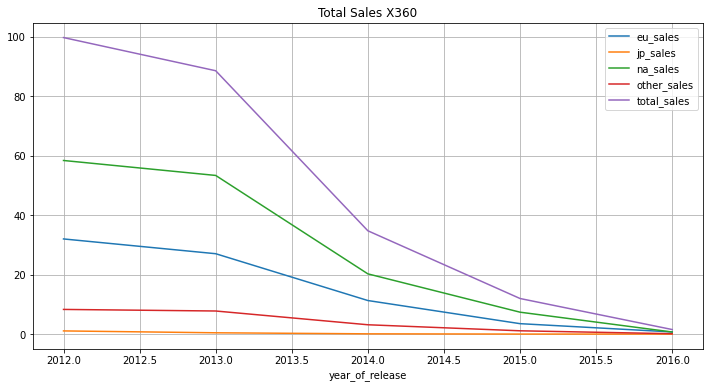

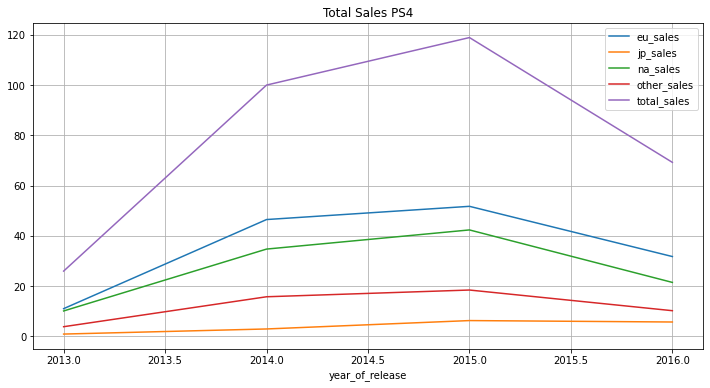

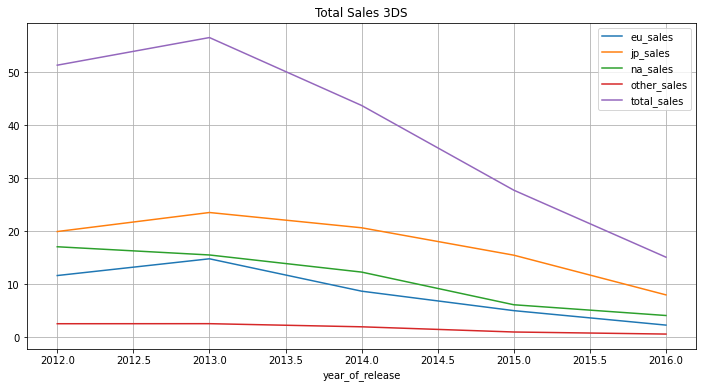

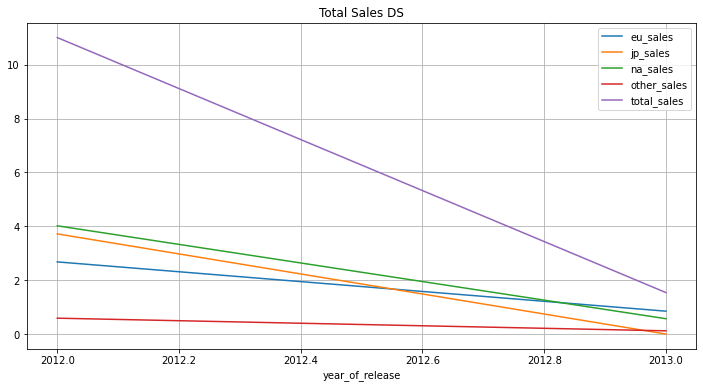

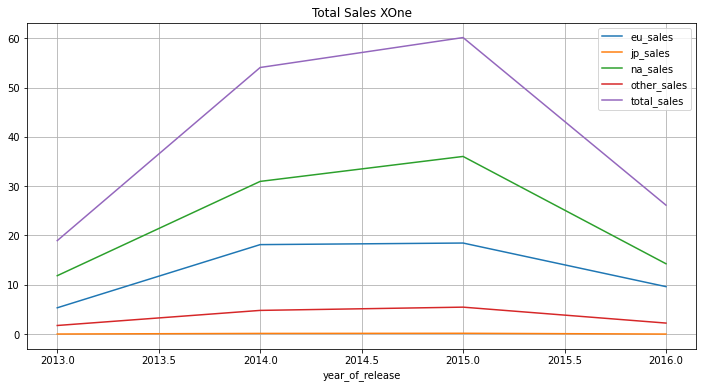

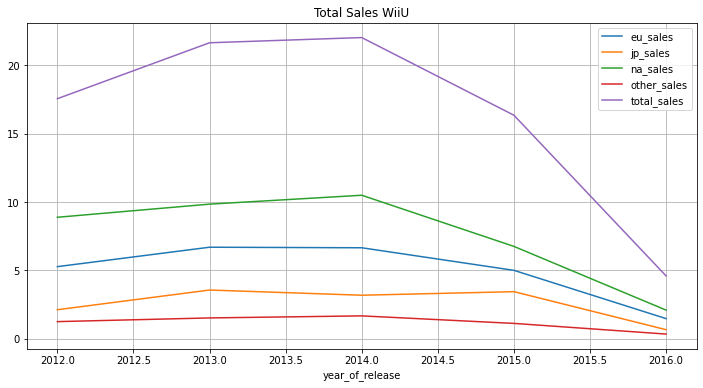

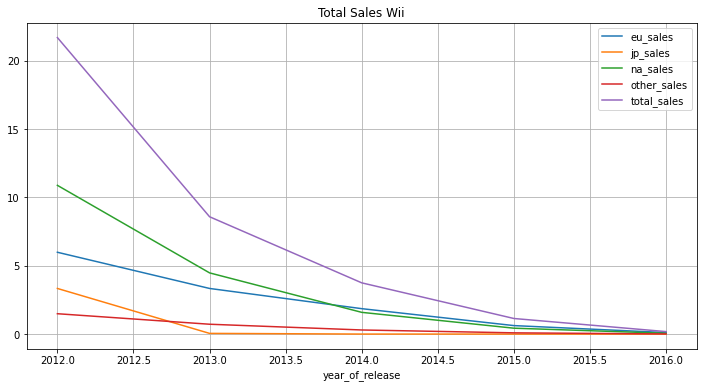

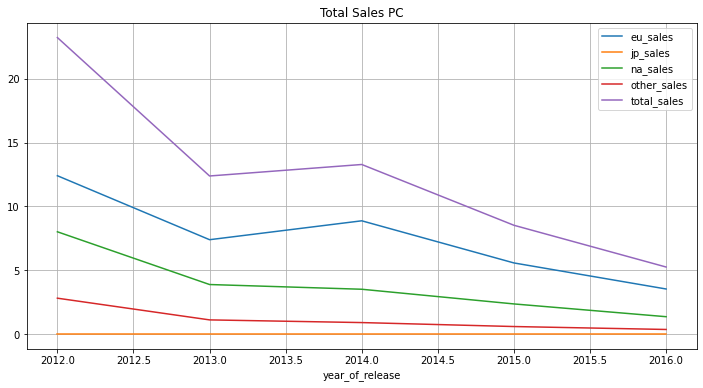

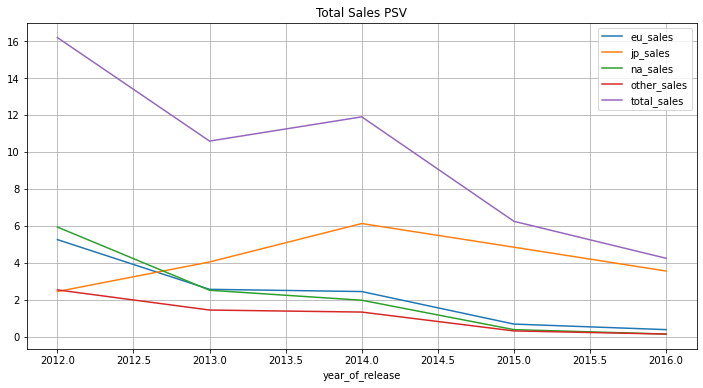

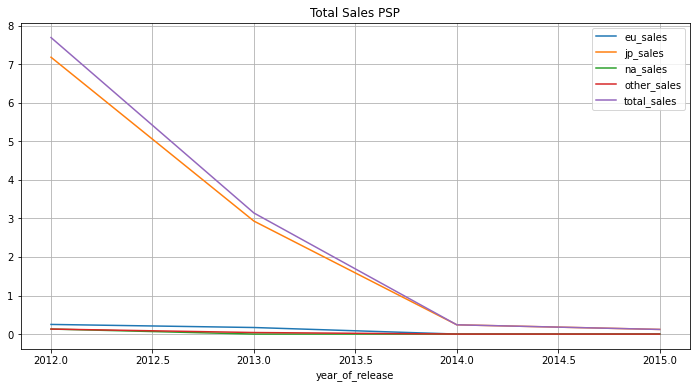

In [67]:
for value in df_games_new['platform'].unique():
    get_plot_year(df_games_new, value)
    plt.show()

In [68]:
#Function to get total_sales in the last year of the platform
def last_year_total_sales(df, year, platform):
    return df.loc[(df['year_of_release'] == year) & (df['platform'] == platform), 'total_sales'].sum()

In [69]:
#PS3
last_year_total_sales(df_games_new, 2016, 'PS3')

3.5999999999999996

In [70]:
#X360
last_year_total_sales(df_games_new, 2016, 'X360')

1.52

In [71]:
#PS4
last_year_total_sales(df_games_new, 2016, 'PS4')

69.25

In [72]:
#3DS
last_year_total_sales(df_games_new, 2016, '3DS')

15.139999999999999

In [73]:
#DS
last_year_total_sales(df_games_new, 2013, 'DS')

1.54

In [74]:
#XOne
last_year_total_sales(df_games_new, 2016, 'XOne')

26.15000000000001

In [75]:
#WiiU
last_year_total_sales(df_games_new, 2016, 'WiiU')

4.6000000000000005

In [76]:
#Wii
last_year_total_sales(df_games_new, 2016, 'Wii')

0.18

In [77]:
#PC
last_year_total_sales(df_games_new, 2016, 'PC')

5.249999999999999

In [78]:
#PSV
last_year_total_sales(df_games_new, 2016, 'PSV')

4.25

In [79]:
#PSP
last_year_total_sales(df_games_new, 2015, 'PSP')

0.12000000000000001

In [80]:
#Dari 31 platform telah difilter berdasarkan tahun yang relevan menjadi 11 platform
df_games_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*From plots and information with filtered dataframes, platform analysis that has the potential to generate profits can be carried out, namely:
- PS4 in 2016 still made around 69M total sales.
- XOne in 2016 still made around 26M total sales.
- 3DS in 2016 still made around 15M total sales.
     
*Platforms that have experienced a decline with total sales below 6M are PS3, WiiU, PC and PSV.
     
*Platforms that experienced a decline with total sales below 2M were X360, DS, Wii and PSP.

</div> 

# Boxplot for global sales of all games grouped by platform <a id='analisa_6'></a>

In [81]:
agg_games_new_platform = df_games_new.groupby(['platform', 'year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

In [82]:
agg_games_new_platform.head(10)

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


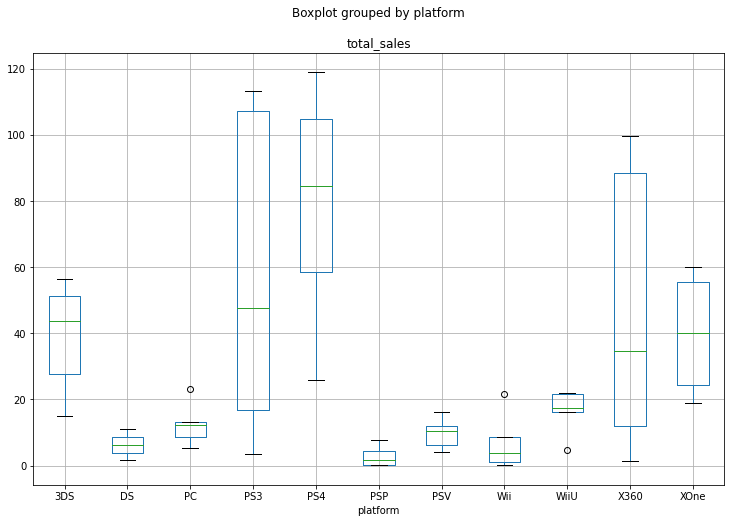

In [83]:
agg_games_new_platform.boxplot(column='total_sales', by='platform', figsize=(12,8))
plt.show()

In [84]:
ordered = agg_games_new_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()['platform']

In [85]:
ordered.head(11)

0      PS4
1      PS3
2     X360
3      3DS
4     XOne
5     WiiU
6       PC
7      PSV
8      Wii
9       DS
10     PSP
Name: platform, dtype: object

In [86]:
agg_games_new_platform.describe()

,year_of_release,total_sales
count,49.000000,49.00000
mean,2013.979592,29.52102
std,1.391788,33.28041
min,2012.000000,0.12000
25%,2013.000000,6.25000
50%,2014.000000,16.35000
75%,2015.000000,43.76000
max,2016.000000,118.90000


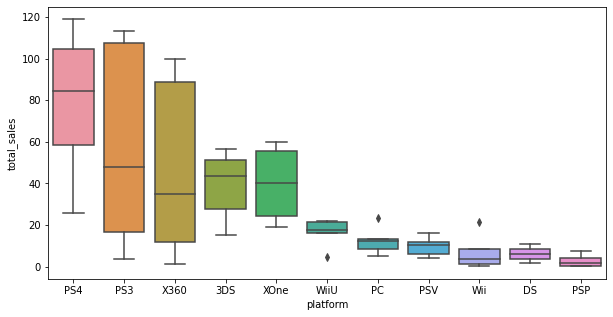

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x='platform', y='total_sales', data=agg_games_new_platform, order=ordered)
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*From the boxplot which has been sorted from the highest average total sales with a filtered dataframe, it can be concluded that the total sales based on the platform have a significant difference. Here's the analysis:
- For PS4 the median is around 82M, meaning that 50% of the total sales value is above and below 82M. Q1 is 60M meaning 25% of total sales is 60M.
- In 2nd place and then there are PS3, X360, 3ds, and XOne.
- This boxplot also supports previous data, namely PS4, XOne, and 3DS are still profitable.

</div> 

# Correlation between reviews and sales on the most popular platforms <a id='analisa_7'></a>

In [88]:
df_games_new.insert(loc=11, column='review_score', value=(df_games_new['critic_score'] + df_games_new['user_score']) / 2)

In [89]:
df_games_new.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,review_score,convert_rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,89.5,6,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,89.0,6,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,NaN,5,14.63


In [90]:
def corr_review_sales(df, device):
    df_games_new_cor = df.loc[df['platform'] == device].reset_index()[['critic_score', 'user_score', 'review_score', 'total_sales']]
    title1 = 'Korelasi total_sales dengan critic_score berdasarkan platform ' + str(device)
    title2 = 'Korelasi total_sales dengan user_score berdasarkan platform ' + str(device)
    title3 = 'Korelasi total_sales dengan review_score berdasarkan platform ' + str(device)
    df_games_new_cor.plot(title=title1, x='critic_score', y='total_sales', kind='scatter', figsize=(10,5), grid='True')
    df_games_new_cor.plot(title=title2, x='user_score', y='total_sales', kind='scatter', figsize=(10,5), grid='True')
    df_games_new_cor.plot(title=title3, x='review_score', y='total_sales', kind='scatter', figsize=(10,5), grid='True')
    print('Tabel korelasi berdasarkan untuk platform ' +str(device))
    return df_games_new_cor.corr()['total_sales']

Tabel korelasi berdasarkan untuk platform PS4


critic_score    0.406568
user_score     -0.031957
review_score    0.192338
total_sales     1.000000
Name: total_sales, dtype: float64

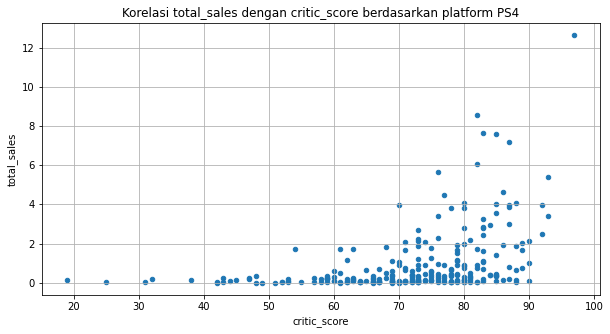

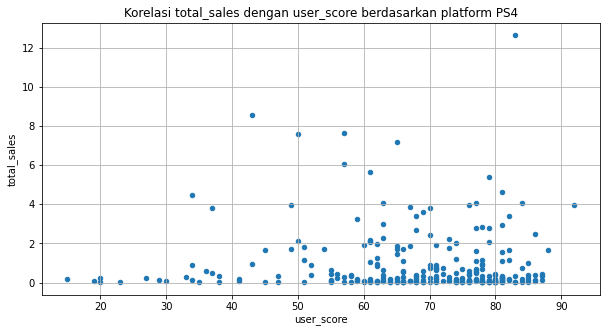

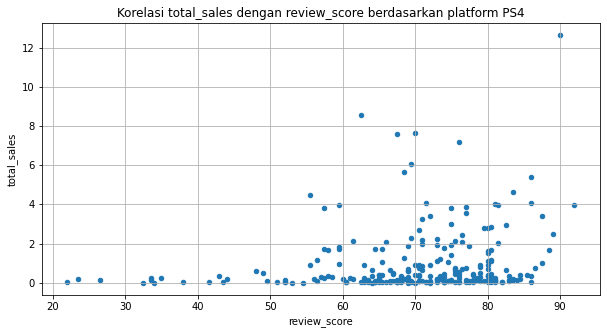

In [91]:
#Correlation on the PS4 platform
corr_review_sales(df_games_new, 'PS4')

<div style="background-color:rgba(0, 255, 172, 0.07)"

*PS4
- The correlation between total_sales and critic_score is 0.3 which is weakly positive. It can be seen in the scatter plot when the critic_score is in the range of 20 to 60, the total_sales is just under 2M. While the critic_score is 70 to 100, there is a slight increase in total_sales with the highest values ​​around 12M and 14M.
- The correlation between total_sales and user_score is -0.05 which is almost unrelated.
- While the correlation between total_sales and review_score (which is obtained from the total critic_score and user_score then divided by two), the value is 0.15 which means that there is almost no relationship.

</div> 

Tabel korelasi berdasarkan untuk platform XOne


critic_score    0.416998
user_score     -0.068925
review_score    0.178567
total_sales     1.000000
Name: total_sales, dtype: float64

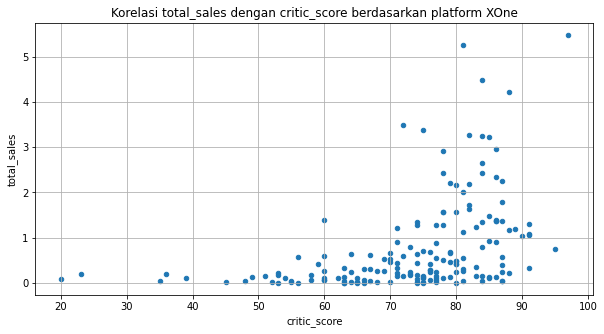

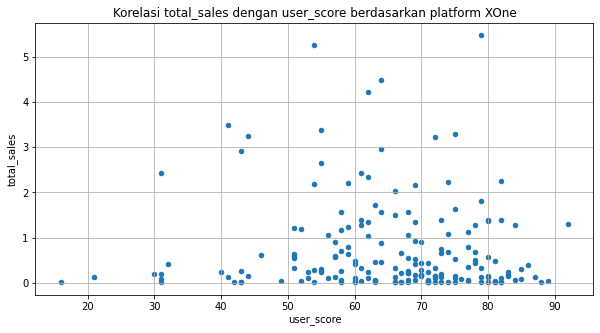

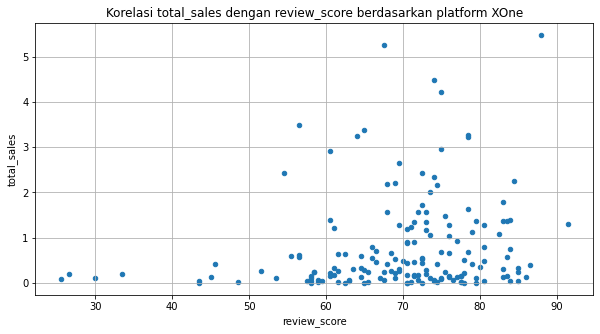

In [92]:
#Correlation on the XOne platform
corr_review_sales(df_games_new, 'XOne')

<div style="background-color:rgba(0, 255, 172, 0.07)"

For the XOne platform, the correlation pattern is almost the same as for the PS4 platform

</div> 

In [93]:
df_games_new['name'].shape[0]

2886

In [94]:
df_games_new['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., '[Prototype 2]', 'htoL#NiQ: The Firefly Diary',
       'inFAMOUS: Second Son'], dtype=object)

# Comparison of sales of the same game on other platforms <a id='analisa_8'></a>

In [95]:
df_top_platform = df_games_new[df_games_new['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]

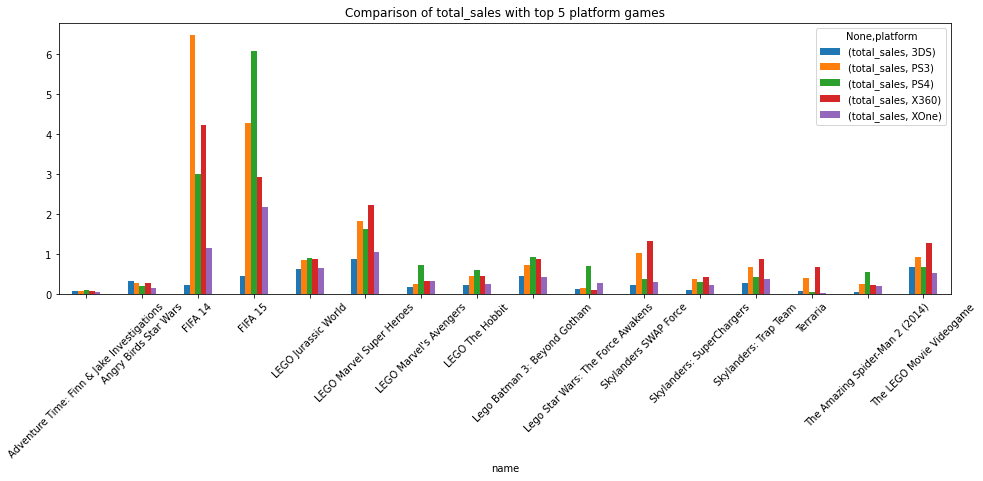

In [97]:
pivot_top_platform = df_top_platform.pivot_table(index=['name', 'platform'], values='total_sales', 
                                                 aggfunc='sum').sort_values(by='total_sales', ascending=False).unstack(1).dropna()
top_platform_plot = pivot_top_platform.plot(kind='bar', figsize=(16,5))
plt.title('Comparison of total_sales with top 5 platform games')
plt.xticks(rotation=45)
plt.show()


<div style="background-color:rgba(0, 255, 172, 0.07)"

Based on the bar plot above, the difference in total sales of the same game from popular platforms varies. Example For FIFA14 the first place is PS3, FIFA15 is PS4, and most LEGO games are X360 platforms.

</div> 

# General distribution of games by genre <a id='analisa_9'></a>

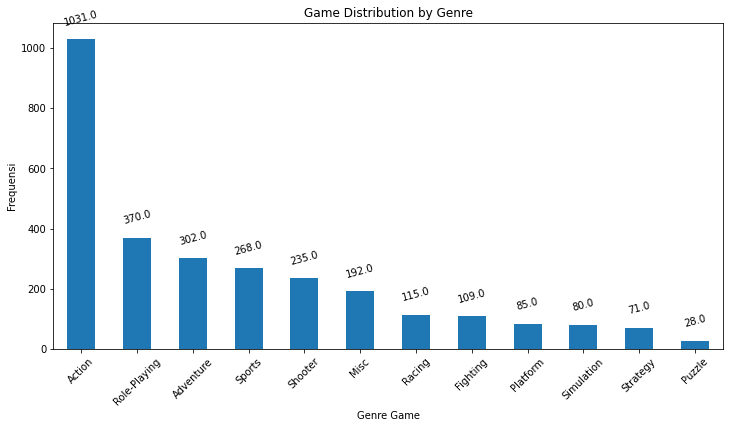

In [99]:
agg_games_new_genre = df_games_new.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

for g in agg_games_new_genre.patches:
    agg_games_new_genre.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=15,
                   textcoords = 'offset points')
    
plt.title('Game Distribution by Genre')
plt.xlabel('Genre Game')
plt.xticks(rotation=45)
plt.ylabel('Frequensi');
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

From the game distribution bar plot above, the Action genre has sold the most, namely 1,000 games, and the Puzzle genre has the least sales.
Let's see if the Action genre is also profitable despite selling a lot of games.

</div> 

In [100]:
pivot_games_new_genre= df_games_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()
pivot_games_new_genre.head(5)

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,159.34,52.80,177.84,51.14,441.12
1,Shooter,113.47,9.23,144.77,37.26,304.73
2,Role-Playing,48.53,65.44,64.00,14.83,192.80
3,Sports,69.09,8.01,81.53,22.44,181.07
4,Misc,26.32,12.86,38.19,7.67,85.04


In [101]:
pivot_games_new_genre['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc', 'Platform',
       'Racing', 'Fighting', 'Simulation', 'Adventure', 'Strategy',
       'Puzzle'], dtype=object)

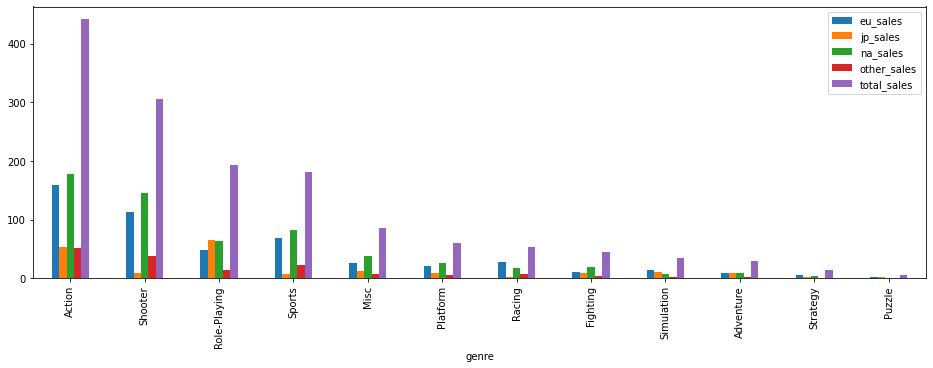

In [102]:
pivot_games_new_genre.plot(kind='bar', x='genre', figsize=(16,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

It turns out that it is true that the Action genre is also the most profitable with total sales above 400M. With the highest distribution in North America. In second place is the shooter genre, and in third place is Role-Playing.

</div> 

# 4. User profiling for each region <a id='langkah4'></a>

# 5 Top platforms by region <a id='top_5_platform'></a>

In [103]:
# Group eu_sales platform
groupby_eu_sales = df_games_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
topfive_eu = groupby_eu_sales.head(5)

# Group na_sales platform
groupby_na_sales = df_games_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
topfive_na = groupby_na_sales.head(5)

# Group jp_sales platform
groupby_jp_sales = df_games_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
topfive_jp = groupby_jp_sales.head(5)

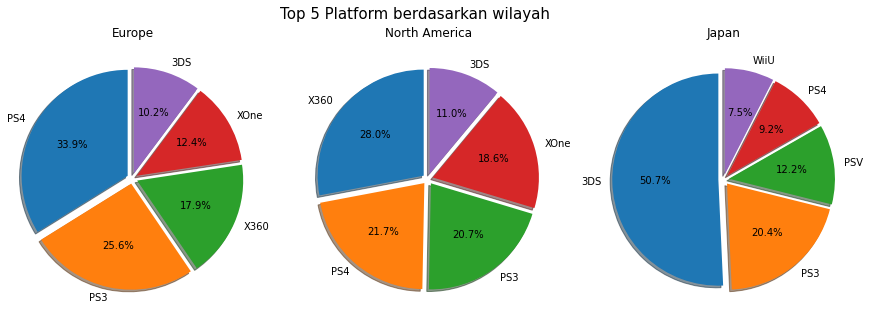

In [104]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

fig.suptitle('Top 5 Platform berdasarkan wilayah', fontsize=15)

#EU
labels = topfive_eu['platform']
sizes = topfive_eu['eu_sales']
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Europe');

#NA
labels = topfive_na['platform']
sizes = topfive_na['na_sales']
explode = (0.05,0.05,0.05,0.05,0.05)

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('North America');

#JP
labels = topfive_jp['platform']
sizes = topfive_jp['jp_sales']
explode = (0.05,0.05,0.05,0.05,0.05)

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('Japan');




<div style="background-color:rgba(0, 255, 172, 0.07)"

*From the pie chart of the Top 5 platforms by region, the following conclusions can be drawn:
- Most popular PS4 in Europe, but ranks 2nd in North America. Then in Japan it ranks 4th out of the TOP 5.
- X360 is most popular in North America, but ranks 3rd in Europe. Then in Japan it is not included in the TOP 5.
- Most popular 3DS in Japan, but ranks 5th in Europe and North America.

</div> 

# Top 5 genres by region <a id='top_5_genre'></a>

In [105]:
# Group eu_sales genre
groupby_eu_sales_genre = df_games_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
topfive_eu_genre = groupby_eu_sales_genre.head(5)

# Group na_sales genre
groupby_na_sales_genre = df_games_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
topfive_na_genre = groupby_na_sales_genre.head(5)

# Group jp_sales genre
groupby_jp_sales_genre = df_games_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
topfive_jp_genre = groupby_jp_sales_genre.head(5)

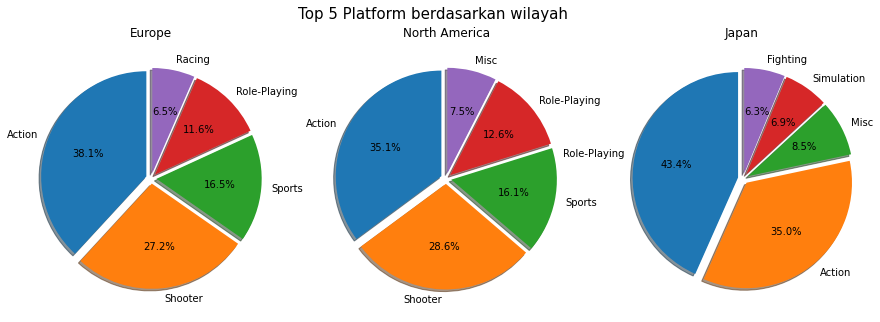

In [106]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

fig.suptitle('Top 5 Platform berdasarkan wilayah', fontsize=15)

#EU
labels = topfive_eu_genre['genre']
sizes = topfive_eu_genre['eu_sales']
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Europe');

#NA
labels = topfive_na_genre['genre']
sizes = topfive_na_genre['na_sales']
explode = (0.05,0.05,0.05,0.05,0.05)

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('North America');

#JP
labels = topfive_jp_genre['genre']
sizes = topfive_jp_genre['jp_sales']
explode = (0.05,0.05,0.05,0.05,0.05)

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('Japan');

<div style="background-color:rgba(0, 255, 172, 0.07)"

*From the pie chart of the Top 5 genres by region, the following conclusions can be drawn:
- The Action genre is most popular in Europe and North America, while in Japan it ranks 2nd.
- The most popular role playing genre in Japan, but only ranked 4th in Europe and North America.

</div> 

# Effect of ESRB rating on sales in each region <a id='pengaruh_esrb'></a>

In [107]:
#ESRB EU
groupby_esrb_eu = df_games_new.groupby(['convert_rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_esrb_eu = groupby_esrb_eu.reset_index(drop=True)
print('Europe')
top_esrb_eu

Europe


,convert_rating,eu_sales
0,6,193.96
1,3,141.25
2,4,98.07
3,5,73.54


In [108]:
#ESRB JP
groupby_esrb_jp = df_games_new.groupby(['convert_rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_esrb_jp = groupby_esrb_jp.reset_index(drop=True)
print('Japan')
top_esrb_jp

Japan


,convert_rating,jp_sales
0,4,92.77
1,3,46.22
2,5,32.39
3,6,21.20


In [109]:
#ESRB NA
groupby_esrb_na = df_games_new.groupby(['convert_rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_esrb_na = groupby_esrb_na.reset_index(drop=True)
print('North America')
top_esrb_na

North America


,convert_rating,na_sales
0,6,231.57
1,3,137.58
2,4,128.63
3,5,93.19


In [110]:
#ESRB JP
groupby_esrb_jp = df_games_new.groupby(['convert_rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_esrb_jp = groupby_esrb_jp.reset_index(drop=True)
print('Japan')
top_esrb_jp

Japan


,convert_rating,jp_sales
0,4,92.77
1,3,46.22
2,5,32.39
3,6,21.20


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
The following are for rating conversion categories:
     
* RP > Rating Pending > - becomes 0
* EC > Early Childhood > 3+ to 1
* K-A > Kids to Adult > 6+ to 2
* E > Everyone > 6+ becomes 3
* E10 + > Everyone 10 and Older > 10+ becomes 4
* T > Teen > 13+ becomes 5
* M > Mature > 17+ becomes 6
* AO > Adult Only > 18+ becomes 7
    
In Europe and North America, games with the most popular conversion rating are 6 or equal to M (Mature) for ages 17+. Whereas in Japan the most popular is the convert rating of 4 or the same as E10 (Everyone 10 and Older) for all ages over 10 years.
</div>

# 5. Hypothesis Test <a id='langkah5'></a>

In [111]:
#Hypothesis Test Function
def hypothesis_test(data1, data2, alpha, var):
    alpha = alpha
    results = st.ttest_ind(data1, data2, equal_var=var)
    print('Nilai p-value adalah: {}'.format(results.pvalue))

    if (results.pvalue < alpha):
        print('Hipotesis Null Ditolak')
    else:
        print('Hipotesis Null Diterima')

# 1. The average user rating of the XOne One and PC platforms is the same <a id='test_1'></a>

In [112]:
df_games_new.query('user_score.notnull()').shape[0]

1531

In [113]:
xone_data = df_games_new.query('user_score.notnull()')
xone_data = df_games_new[df_games_new['platform'] == 'XOne']['user_score']
xone_data.mean() 

65.21428571428571

In [114]:
pc_data = df_games_new.query('user_score.notnull()')
pc_data = df_games_new[df_games_new['platform'] == 'PC']['user_score']
pc_data.mean() 

64.2864077669903

In [115]:
#Persentase perbedaan varians
100 - (np.var(xone_data) * 100 / np.var(pc_data))

31.210659675285925

<div style="background-color:rgba(0, 255, 172, 0.07)"

*The average XOne user_score is 65.2, and not much different from the PC, which is 64.2. We will use this as the Null Hypothesis with variance=False because the percentage difference in variance is 37%. So like this:
     
- H0 is the average user rating for the Xbox One and PC platforms alike
- H1 is the average user rating for Xbox One and PC platforms is different

</div> 

In [116]:
hypothesis_test(xone_data.dropna(), pc_data.dropna(), 0.05, False)

Nilai p-value adalah: 0.5489537965135056
Hipotesis Null Diterima


<div style="background-color:rgba(0, 255, 172, 0.07)"

The conclusion of Test 1 is that the average user rating for the Xbox One and PC platforms is the same.

</div> 

# 2. The average user rating for the Action and Sports genres is different <a id='test_2'></a>

In [117]:
df_games_new.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [118]:
action_data = df_games_new.query('user_score.notnull()')
action_data = df_games_new.loc[df_games_new['genre'] == 'Action']['user_score']
action_data.mean() 

68.25047801147228

In [119]:
sports_data = df_games_new.query('user_score.notnull()')
sports_data = df_games_new.loc[df_games_new['genre'] == 'Sports']['user_score']
sports_data.mean() 

54.55897435897436

In [120]:
#Persentase perbedaan varians
100 - (np.var(action_data) * 100 / np.var(sports_data))

37.30533447189525

<div style="background-color:rgba(0, 255, 172, 0.07)"

*The average user_score for the action genre is 68.2, and slightly different from the sports genre, which is 54.5. We will use this as the Alternative Hypothesis. It means that the Null Hypothesis is that the average user rating for the Action and Sports genres is the same as variant=False because the percentage difference in variance is 63%. So like this:
- HO is the average user rating for the Action and Sports genres alike
- H1 is the average user rating of different Action and Sports genres

</div> 

In [121]:
hypothesis_test(action_data, sports_data, 0.05, False)

Nilai p-value adalah: nan
Hipotesis Null Diterima


<div style="background-color:rgba(0, 255, 172, 0.07)"

The conclusion of Test 2 is that the average user rating for the Action and Sports genres is different.
</div> 

# General Conlcusions <a id='kesimpulan_umum'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"

* In the first step we read data and general information from a dataframe. There are some missing values.
  In addition, some data types must also be corrected. The next step is to fix column names, fix missing values ​​by filling in the median or mean of the grouped data.
  and fix the data type.
* Step 3 is to analyze the data with some analysis. Here are some general findings of the analysis:
  - The first game appeared in 1980 with a small number of released games. Starting in 2001 there was an increase in the number of games released, and the peak was in 2008.
  - Out of a total of 31 platforms, total sales from one platform to another vary greatly. The top 5 in a row are PS2, X360, PS3, Wii and DS.
  - The most popular game is PS2. PS2 appeared in 2000 with total sales of around 40M. The total sales continued to increase until 2002 with a value of around 210M.
  - Also found It can be concluded from the 31 platforms above that it takes at least 1 year or a maximum of 5 years to reach peak total sales.
    Then it took 3 years at the fastest or 8 years at the most to decline and almost no sales.
  - After filtering by the release year of the 8th game generation, which is more than the same as 2012, PS4 occupies the first place in total sales, followed by PS3, X360, 3DS, and XOne.
  - For PS, XOne and 3DS until 2016 it is still profitable.
  - From the boxplot that has been sorted from the highest average total sales with a filtered dataframe, it can be concluded that the average total sales based on the platform has a significant difference.
  - Correlation between total sales and positive user score is weak. Meanwhile, with a weak critic score and review score, there is almost nothing to do with it.
  - Also found differences in total sales of the same game from various popular platforms (PS3, X360, 3DS, and XOne).
- By genre, the most popular genre is the action genre, while the least popular is the puzzle genre. The action genre also has the most total sales.
* Step 4 is to perform user profiling by region, along with the findings.
  - The most popular PS4 in Europe. The X360 is most popular in North America, while the 3DS is most popular in Japan.
  - The most popular action genre in Europe and North America. And the Role Playing genre is most popular in Japan
  - For ratings, in Europe and North America the most played games are games with an M rating, or those aged 17+. Meanwhile, in Japan, the rating is E10, or for all ages over 10 years.
* We want to know two hypotheses, and it can be concluded as follows:
  - The average user rating for Xbox One and PC platforms is the same.
  - The average user rating for the Action and Sports genres is different
* From all the findings and insights above, it can be recommended for companies to carry out game advertising campaigns in 2017 with the following submissions:
  - Choose popular platforms namely PS4, PS3, X360, 3DS, and XOne.
  - Choose a popular genre, namely the Action genre for the platforms above.
  - Europe prioritizes the PS4 platform, North America prioritizes the X360 platform, while Japan prioritizes the 3DS platform.
  - For Europe and North America the priority is the Action genre, while Japan is the Role Playing genre.
  - For the Europe and North America regions, games with an M Rating are prioritized, while Japan games are rated E10.
        
</div>